<a href="https://colab.research.google.com/github/PyBeginner1/CATScanLocationPrediction/blob/main/CATScan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [7]:
data = pd.read_csv('/content/slice_localization_data.csv')

In [8]:
data

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value22,value23,value24,value25,value26,value27,value28,value29,value30,value31,value32,value33,value34,value35,value36,value37,value38,...,value345,value346,value347,value348,value349,value350,value351,value352,value353,value354,value355,value356,value357,value358,value359,value360,value361,value362,value363,value364,value365,value366,value367,value368,value369,value370,value371,value372,value373,value374,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,0.000000,0.000000,0.0,0.956533,0.852100,0.0,0.0,0.0,0.00,-0.25,0.000000,0.000000,0.0,0.932476,0.960794,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,-0.25,0.967973,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.850746,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.25,0.980381,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.803851
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,0.000000,0.000000,0.000000,0.861605,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,0.000000,0.000000,0.0,0.946915,0.884351,0.0,0.0,0.0,0.00,-0.25,0.000000,0.000000,0.0,0.938720,0.961557,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,-0.25,0.988671,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.946276,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.854305,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.745726
2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,0.000000,0.000000,0.000000,0.894040,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,0.000000,0.000000,0.0,0.940655,0.887910,0.0,0.0,0.0,0.00,-0.25,0.000000,0.000000,0.0,0.940184,0.960391,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,-0.25,0.988671,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.959610,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.854305,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.687600
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,0.000000,0.000000,0.000000,0.906892,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,0.000000,0.000000,0.0,0.945592,0.861041,0.0,0.0,0.0,0.00,-0.25,0.000000,0.000000,0.0,0.944993,0.955290,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,-0.25,0.984759,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.851485,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.25,0.977008,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.629474
4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.25000,-0.250000,0.000000,0.000000,0.000000,0.926247,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,0.000000,0.000000,0.0,0.934426,0.878002,0.0,0.0,0.0,0.00,-0.25,0.000000,0.000000,0.0,0.950723,0.957906,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,-0.25,0.984642,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.921763,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.25,0.976833,0.0,0.000000,0.000000,0.0,0.0,-0.25,-0.25,21.571348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53495,96,0.591906,0.357764,0.000000,0.000000,0.552321,0.795304,0.946697,0.952227,0.84395,0.798303,0.059880,0.000000,0.000000,0.000000,0.696325,0.151422,0.695652,0.799930,0.621118,0.754552,0.061920,0.000000,0.0,0.793251,0.958272,0.0,0.0,0.0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53500 entries, 0 to 53499
Columns: 386 entries, patientId to reference
dtypes: float64(385), int64(1)
memory usage: 157.6 MB


In [11]:
data.isnull().sum().sum()

0

**Preprocessing**

In [22]:
def preprocess_inputs(df):
  df = df.copy()

  #drop patient id column
  df = df.drop('patientId', axis = 1)

  #split Features & target(reference)
  X = df .drop('reference', axis = 1)
  Y = df['reference']

  #train & test split
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True, random_state =1)

  return X_train, X_test, Y_train, Y_test

In [23]:
X_train, X_test, Y_train, Y_test = preprocess_inputs(data)

In [25]:
X.shape, X_train.shape, X_test.shape



((53500, 384), (37450, 384), (16050, 384))

In [26]:
Y_train

36958    53.168322
20128    78.796527
33249    34.740313
33896    29.947560
15142    15.880591
           ...    
50057    74.919418
32511    23.360237
5192     63.332494
12172    68.634920
33003    55.135923
Name: reference, Length: 37450, dtype: float64

In [27]:
X_train.describe()

,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value22,value23,value24,value25,value26,value27,value28,value29,value30,value31,value32,value33,value34,value35,value36,value37,value38,value39,...,value344,value345,value346,value347,value348,value349,value350,value351,value352,value353,value354,value355,value356,value357,value358,value359,value360,value361,value362,value363,value364,value365,value366,value367,value368,value369,value370,value371,value372,value373,value374,value375,value376,value377,value378,value379,value380,value381,value382,value383
count,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.00000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,...,37450.00000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.00,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000,37450.000000
mean,0.059190,0.071638,0.147057,0.218527,0.273778,0.275567,0.205600,0.062025,-0.043025,-0.231485,0.053469,0.060927,0.131380,0.177532,0.202306,0.163737,0.109288,0.022156,-0.008995,-0.079680,0.059075,0.076659,0.122410,0.160426,0.161721,0.111850,0.044131,0.003666,-0.002972,-0.029486,0.06604,0.097599,0.135846,0.166686,0.151863,0.109558,0.034659,-0.042398,-0.123124,-0.199626,...,0.23031,0.109551,0.024389,0.007145,-0.025024,-0.175218,-0.224306,-0.25,0.188337,0.136350,0.234143,0.197890,0.051943,-0.074748,-0.205525,-0.235674,0.191901,0.285616,0.335796,0.314241,0.222674,0.019020,-0.020202,-0.105648,0.197818,0.331344,0.356510,0.347568,0.274775,0.087920,0.004943,-0.029206,0.183695,0.320226,0.359270,0.344180,0.265875,0.084800,-0.031221,-0.155017
std,0.173515,0.196934,0.301534,0.359447,0.378443,0.369504,0.352174,0.291662,0.267587,0.100615,0.160762,0.179958,0.282238,0.323860,0.335597,0.302317,0.260598,0.173129,0.169358,0.165425,0.169431,0.203972,0.270508,0.307105,0.312355,0.264397,0.166671,0.063633,0.075218,0.094905,0.18117,0.227945,0.279376,0.314405,0.311044,0.279660,0.193835,0.094982,0.124988,0.100281,...,0.41742,0.307096,0.148982,0.092490,0.096374,0.119155,0.082154,0.00,0.387162,0.336741,0.419362,0.393698,0.228485,0.118608,0.098325,0.058106,0.389540,0.447642,0.470442,0.461456,0.411451,0.141246,0.081607,0.123494,0.394333,0.467932,0.476939,0.473458,0.441554,0.275066,0.075429,0.085841,0.383887,0.463548,0.478132,0.472092,0.437623,0.282430,0.097597,0.122500
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,0.00000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,...,0.00000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,-0.25,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-0.250000,-0.250000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

Training

In [33]:
inputs = tf.keras.Input(shape = 384, )   #384 is no. of rows
x = tf.keras.layers.Dense(128, activation ='relu') (inputs)
x = tf.keras.layers.Dense(128, activation = 'relu') (x)
outputs = tf.keras.layers.Dense(1, activation = 'linear') (x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = 'adam', loss = 'mse')


history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 1000, batch_size = 32, callbacks =
                    [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience =3, restore_best_weights = True )])

#patience = Number of epochs with no improvement after which training will be stopped

Epoch 1/1000
937/937 [==============================] - 3s 3ms/step - loss: 132.3750 - val_loss: 23.7413
Epoch 2/1000
937/937 [==============================] - 2s 2ms/step - loss: 13.1348 - val_loss: 7.8770
Epoch 3/1000
937/937 [==============================] - 2s 2ms/step - loss: 5.4950 - val_loss: 3.9861
Epoch 4/1000
937/937 [==============================] - 2s 2ms/step - loss: 3.0590 - val_loss: 2.6866
Epoch 5/1000
937/937 [==============================] - 2s 2ms/step - loss: 2.1849 - val_loss: 3.7271
Epoch 6/1000
937/937 [==============================] - 2s 2ms/step - loss: 1.7008 - val_loss: 2.0099
Epoch 7/1000
937/937 [==============================] - 2s 2ms/step - loss: 1.4412 - val_loss: 1.6637
Epoch 8/1000
937/937 [==============================] - 2s 2ms/step - loss: 1.3135 - val_loss: 2.0468
Epoch 9/1000
937/937 [==============================] - 2s 2ms/step - loss: 1.1171 - val_loss: 1.2987
Epoch 10/1000
937/937 [==============================] - 2s 2ms/step - loss: 1

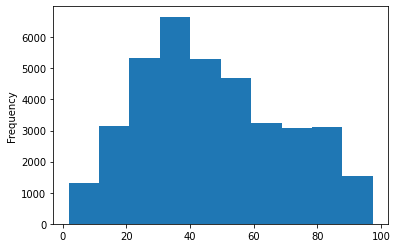

In [36]:
Y_train.plot(kind = 'hist')

**Results**

In [38]:
y_pred = model.predict(X_test) 

In [40]:
Y_test.shape

(16050,)

In [41]:
y_pred.shape

(16050, 1)

we use np.squeeze to squeeze out that extra dimension in y_pred


In [42]:
y_pred = np.squeeze(model.predict(X_test))

In [44]:
y_pred.shape

(16050,)

In [50]:
rmse = np.sqrt(np.mean((Y_test - y_pred) ** 2))
print("RMSE :{:.5f}".format(rmse))

RMSE :0.84017


In [53]:
from sklearn.metrics import r2_score

In [69]:
score = r2_score(Y_test, y_pred)
print("R^2 Score: {:.5f}".format(score))

R^2 Score: 0.99859


**r2_score formula breakdown**

In [59]:
np.sum((Y_test - y_pred) ** 2)

8022031.62708539

In [63]:
np.sum((Y_test - y_pred) ** 2)

11329.345456242758

In [70]:
score1 = 1 - (np.sum((Y_test - y_pred)**2) / np.sum((Y_test - Y_test.mean())**2))
print(("R^2 Score: {:.5f}".format(score1)))

R^2 Score: 0.99859
